In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [8]:
df = pd.read_csv("./data.csv", delimiter=";")

df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [9]:
df.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012])

In [28]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [31]:
X = prod_per_year["year"]
X = X.values.reshape(-1,1)

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]])

In [32]:
y = prod_per_year["totalprod"]

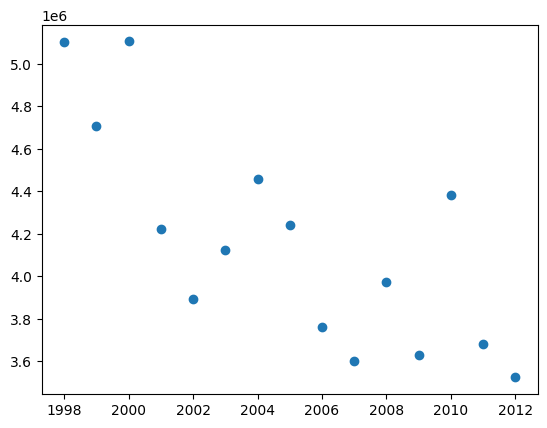

In [34]:
plt.scatter(X, y)
plt.show()

Can you see a vaguely linear relationship between these variables?

yes, there is a linear relationship

In [35]:
regr = linear_model.LinearRegression()

In [42]:
regr.fit(X, y)
print("slope of the line: ",regr.coef_[0])
print("intercept of the line: ",regr.intercept_)

slope of the line:  -88303.18915238195
intercept of the line:  181208083.10732982


[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934687 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


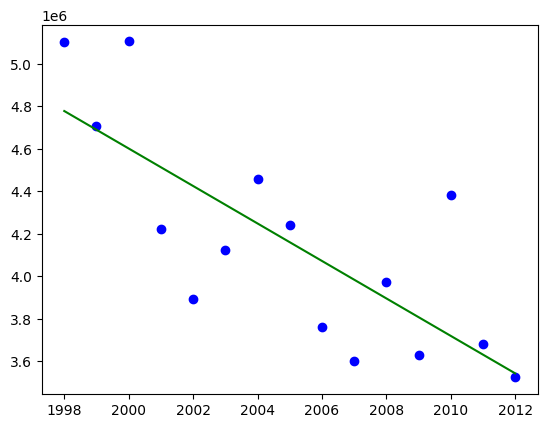

In [44]:
y_predict = regr.predict(X)
print(y_predict)
plt.scatter(X, y, color = "b")
plt.plot(X, y_predict, "g-")
plt.show()

So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

Our known dataset stops at the year 2013, so let’s create a NumPy array called X_future that is the range from 2013 to 2050. The code below makes a NumPy array with the numbers 1 through 10

In [56]:
X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1)
print(X_future)

[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]
 [2030]
 [2031]
 [2032]
 [2033]
 [2034]
 [2035]
 [2036]
 [2037]
 [2038]
 [2039]
 [2040]
 [2041]
 [2042]
 [2043]
 [2044]
 [2045]
 [2046]
 [2047]
 [2048]
 [2049]
 [2050]]


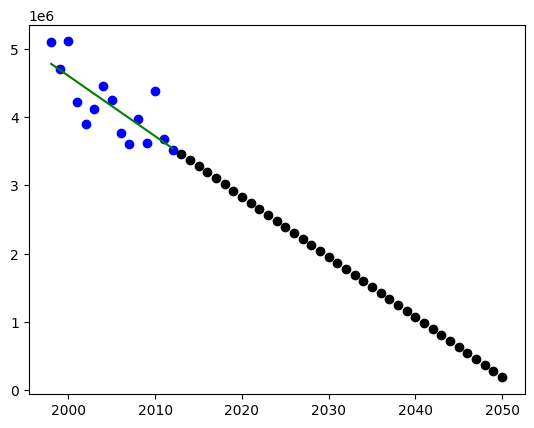

In [61]:
future_predict = regr.predict(X_future)
plt.scatter(X, y, color = "b")
plt.plot(X, y_predict, color = "g")
plt.scatter(X_future, future_predict, color = "k")
plt.show()

In [58]:
print(X_future[-1], future_predict[-1])

[2050] 186545.34494683146


The total production of honey seems to be declining over time. By 2050 the total production of honey reaches ~ 1.86x10^5